In [1]:
import numpy as np
import xdesign
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
%matplotlib inline

`polytope` failed to import `cvxopt.glpk`.
will use `scipy.optimize.linprog`


# Create object

In [2]:
def generate_disk(shape, radius, anti_aliasing=5):

    shape = np.array(shape)
    radius = int(radius)
    x = np.linspace(-radius, radius, (radius * 2 + 1) * anti_aliasing)
    y = np.linspace(-radius, radius, (radius * 2 + 1) * anti_aliasing)
    xx, yy = np.meshgrid(x, y)
    a = (xx**2 + yy**2 <= radius**2).astype('float')
    res = np.zeros(shape * anti_aliasing)
    center_res = (np.array(res.shape) / 2).astype('int')
    res[center_res[0] - int(a.shape[0] / 2):center_res[0] - int(a.shape[0] / 2) + a.shape[0],
        center_res[1] - int(a.shape[0] / 2):center_res[1] - int(a.shape[0] / 2) + a.shape[1]] = a
    res = gaussian_filter(res, 0.5 * anti_aliasing)
    res = res[::anti_aliasing, ::anti_aliasing]
    return res

def plot_mod_and_phase(arr, figsize=(12, 5), title=None, unwrap=False):
    
    fig = plt.figure(figsize=figsize)
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(np.abs(sim.wavefront))
    plt.title('Modulus')
    ax2 = fig.add_subplot(1, 2, 2)
    phase_term = np.angle(sim.wavefront)
    if unwrap:
        phase_term = np.unwrap(phase_term)
    ax2.imshow(phase_term)
    plt.title('Phase')
    if title is not None:
        plt.suptitle(title)
    plt.show()

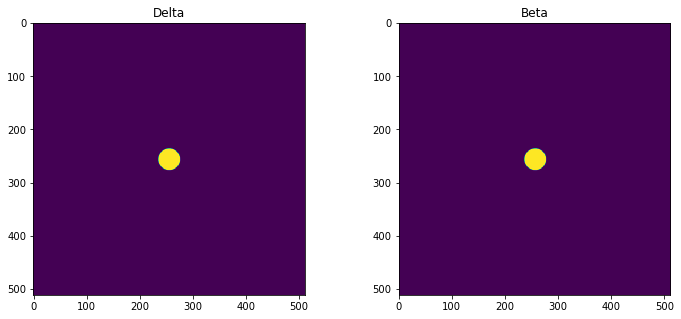

In [3]:
slice_size = 512
psize_cm = 100.e-7
energy_ev = 5000
free_prop_dist_cm = 10
delta = 1.
beta = 1.e-6
delta_slice = generate_disk([slice_size, slice_size], 20, anti_aliasing=5) * delta
beta_slice = generate_disk([slice_size, slice_size], 20, anti_aliasing=5) * beta
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(delta_slice)
plt.title('Delta')
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(beta_slice)
plt.title('Beta')
plt.show()

# Propagator

In [4]:
grid_delta = delta_slice[:, :, np.newaxis]
grid_beta = beta_slice[:, :, np.newaxis]
sim = xdesign.Simulator(energy_ev, grid=[grid_delta, grid_beta], psize=[psize_cm, psize_cm, psize_cm])

# Using a plane wave

Slice: 0
TF
IR


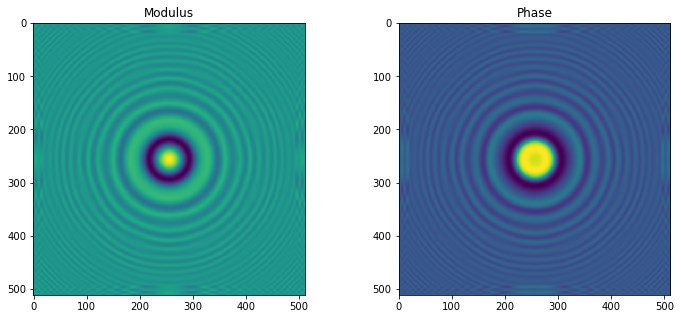

In [5]:
sim.initialize_wavefront('plane')
# print(np.abs(sim.wavefront))
# print(np.angle(sim.wavefront))
sim.multislice_propagate(free_prop_dist=free_prop_dist_cm)
plot_mod_and_phase(sim.wavefront, unwrap=True)

# Using a spherical wave

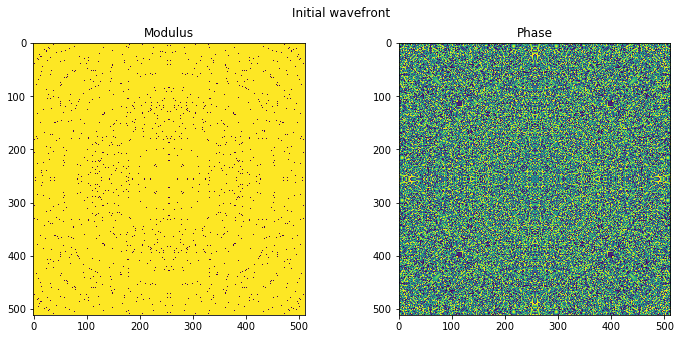

Slice: 0
TF
IR


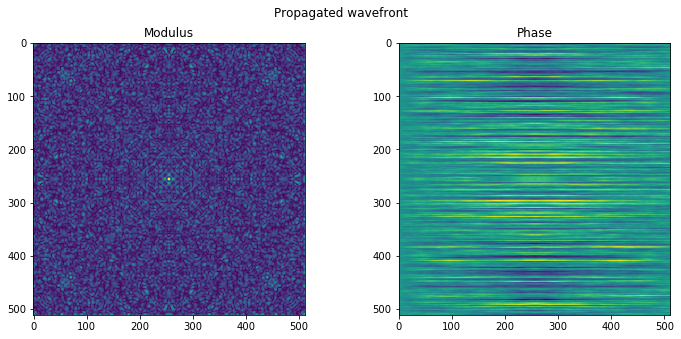

In [6]:
dist_to_source_nm = 1.32e3
sim.initialize_wavefront('spherical', dist_to_source=dist_to_source_nm)
plot_mod_and_phase(sim.wavefront, title='Initial wavefront')
# print(np.abs(sim.wavefront))
# print(np.angle(sim.wavefront))
# np.set_printoptions(threshold=np.inf)
sim.multislice_propagate(free_prop_dist=free_prop_dist_cm, free_prop_method='fresnel')
plot_mod_and_phase(sim.wavefront, title='Propagated wavefront', unwrap=True)